In [22]:
import pandas as pd
import numpy as np
import os

#df_hospital = pd.read_excel(r'../df_hospital_x.xlsx')
df_NI = pd.read_excel(r'NonInvasive_Invasive_classification.xlsx')
#df_NI = df_NI.rename(columns={0: "features", "I/NI": "Invasive_or_not"})
#df_NI = df_NI.drop(columns=['Unnamed: 0'])


#df_NI = df_NI.drop(df_NI[df_NI['Remove or Not']=='Remove'].index).reset_index(drop=True)
#df_NI = df_NI.drop(columns=['Remove or Not'])
df_NI

,features,Invasive_or_not
0,baby_age_of_admission,Non Invasive
1,baby_apgar_score_one_min,Non Invasive
2,baby_apgar_score_five_min,Non Invasive
3,baby_apgar_score_ten_min,Non Invasive
4,baby_preterm,Non Invasive
...,...,...
71,frequency_of_stools,Non Invasive
72,diarrhea,Non Invasive
73,vomiting,Non Invasive
74,feeding_intolerance,Non Invasive


In [23]:
import pandas as pd

#df_hospital = pd.read_excel(r'C:\Users\SPK_ADMIN\Desktop\ILS\MLmodel_Project\Developing_ML_model\Overall Hospitals\latest_original.xlsx')

#df_hospital = pd.read_excel(r'C:\Users\SPK_ADMIN\Desktop\ILS\MLmodel_Project\Developing_ML_model\Overall Hospitals\Jan92023-proddata.xlsx')

df_hospital = pd.read_excel(r'../ft_original_Jan92023.xlsx')
df_hospital.shape

(6612, 214)

In [24]:
df_hospital_bcr = df_hospital[df_hospital['blood_culture_report'].notna()].reset_index(drop=True)
df_hospital_bcr = df_hospital_bcr.drop(columns=['baby_age_of_admission'])

df_hospital_bcr.shape

(3497, 213)

In [25]:
df_NI_hospital = pd.DataFrame(columns=df_NI['features'],data=df_hospital_bcr)
df_NI_hospital = df_NI_hospital.join(df_hospital_bcr['blood_culture_report']).reset_index(drop=True)
df_NI_hospital['blood_culture_report'] = df_NI_hospital['blood_culture_report'].replace('Positive',1).replace('Negative',0)
df_NI_hospital.to_pickle('df_NI_hospital.pkl')
df_NI_hospital

,baby_age_of_admission,baby_apgar_score_one_min,baby_apgar_score_five_min,baby_apgar_score_ten_min,baby_preterm,birth_facility,preterm_status,baby_weight_at_birth,baby_weight_at_admission,mother_age,...,seizures,abnormal_movements_like_tonic_posturing,af_bulge,abdominal_dystension,frequency_of_stools,diarrhea,vomiting,feeding_intolerance,baby_movement,blood_culture_report
0,NaN,NaN,NaN,NaN,Yes,NaN,preterm,1.4,1.4,NaN,...,No,No,No,No,2.0,No,No,No,NaN,1
1,NaN,NaN,NaN,NaN,Yes,NaN,preterm,1.4,1.4,NaN,...,No,No,No,No,2.0,No,No,No,NaN,1
2,NaN,NaN,NaN,NaN,Yes,NaN,preterm,1.4,1.4,NaN,...,No,No,No,No,2.0,No,No,No,NaN,1
3,NaN,NaN,NaN,NaN,Yes,NaN,preterm,1.4,1.4,NaN,...,No,No,No,No,2.0,No,No,No,NaN,1
4,NaN,NaN,NaN,NaN,Yes,NaN,preterm,1.4,1.4,NaN,...,No,No,No,No,2.0,No,No,No,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,NaN,NaN,NaN,NaN,Yes,NaN,preterm,1.9,1.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3493,NaN,NaN,NaN,NaN,Yes,NaN,preterm,1.9,1.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3494,NaN,NaN,NaN,NaN,Yes,NaN,preterm,1.9,1.9,NaN,...,No,NaN,No,No,NaN,No,No,NaN,NaN,1
3495,NaN,7.0,8.0,8.0,Yes,NICU,preterm,1.3,1.3,32.0,...,No,No,No,Yes,3.0,No,Yes,Yes,NaN,1


# Pipeline Code

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression  
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df_NI_hospital = df_NI_hospital.astype('str')
df_NI_hospital_lencoded = pd.DataFrame(columns=df_NI_hospital.columns,data=LabelEncoder().fit_transform(df_NI_hospital.values.flatten()).reshape(df_NI_hospital.shape))


#GET LIST OF ALL FEATURES 
features_all = df_NI_hospital.drop(columns=['blood_culture_report']).columns


impute_pipe = Pipeline([('knn_imputer', KNNImputer())])



                     
                     
preprocessor = ColumnTransformer(transformers=[
                                               
                                               ('impute_pipe', impute_pipe, features_all)
                                              
                                              ],
                                 remainder='passthrough'
                                )

                                                              
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

df_encoded_imputed = preprocessing_pipeline.fit_transform(df_NI_hospital_lencoded.drop(columns=['blood_culture_report']), df_NI_hospital['blood_culture_report'])

df_encoded_imputed = pd.DataFrame(columns=df_NI_hospital_lencoded.drop(columns=['blood_culture_report']).columns,data=df_encoded_imputed)

df_encoded_imputed[['blood_culture_report']] = df_NI_hospital[['blood_culture_report']].to_numpy()


class SmoteTomekSampling(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        smotek = SMOTETomek(random_state=42)
        x_smotom, y_smotom = smotek.fit_resample(X.drop(columns=['blood_culture_report']), X['blood_culture_report'])
        X = x_smotom.join(y_smotom) 
        return X

    
    
class traintest_model(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        x_train, x_test, y_train, y_test = train_test_split(X.drop(columns=['blood_culture_report']), X['blood_culture_report'], test_size = 0.3, random_state = 0)
        
        classifier_lr= LogisticRegression(C=1.0, class_weight='balanced', fit_intercept=True,  
                   intercept_scaling=1, l1_ratio=1, max_iter=1000,  
                   multi_class='ovr', penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, 
                   warm_start=False)
        sel_lrrfe = RFE(LogisticRegression())
        sel_lrrfe.fit(x_train,y_train)
        features_lrrfe = x_train.columns[sel_lrrfe.get_support()]
        df_lrrfe_feat = pd.DataFrame(columns=features_lrrfe,data=X.drop(columns='blood_culture_report'))
        
        x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(df_lrrfe_feat, X['blood_culture_report'], test_size = 0.3, random_state = 0)
        
        clf_lrrfe = LogisticRegression(C=1.0, class_weight='balanced', fit_intercept=True,  
                   intercept_scaling=1, l1_ratio=1, max_iter=100,  
                   multi_class='ovr', penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, 
                   warm_start=False)

        clf_lrrfe.fit(x_trainlr, y_trainlr)
        X = clf_lrrfe.predict_proba(df_lrrfe_feat.iloc[-1:])       
        return X

    
    


LR_model = Pipeline(
    steps=[
         ("SMOTETOMEK", SmoteTomekSampling()),
         ("traintest_model",traintest_model())
        
          ]
       )

df_sampled = LR_model.fit_transform(df_encoded_imputed, df_encoded_imputed['blood_culture_report'])
df_sampled

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([[0.57948551, 0.42051449]])

In [27]:
from itertools import *
from sklearn.preprocessing import LabelEncoder

df_hospital_test = df_NI_hospital.reset_index(drop=True).sort_index(ascending=True)

In [28]:
df_hospital_test = df_hospital_test.replace('nan',np.nan)


null_rows = [index for index, row in df_hospital_test.iterrows() if row.isnull().any()]
r,c = np.where(df_hospital_test.isnull().values)
null_row = null_rows[0]
null_column = df_hospital_test.columns[c[0]]


df_hospital_test._get_value(null_row, null_column)


nan

In [29]:
df_hospital_test = df_hospital_test.astype('str')

df_hospital_test_lencoded = pd.DataFrame(columns=df_hospital_test.columns,data=LabelEncoder().fit_transform(df_hospital_test.values.flatten()).reshape(df_hospital_test.shape))

value_nan = df_hospital_test_lencoded._get_value(null_row, null_column)

df_hospital_test_lencoded  = df_hospital_test_lencoded.replace(value_nan,np.nan)

df_hospital_test_lencoded = df_hospital_test_lencoded.fillna(-100)



In [30]:
df_hospital_test_lencoded.isna().sum()

baby_age_of_admission        0
baby_apgar_score_one_min     0
baby_apgar_score_five_min    0
baby_apgar_score_ten_min     0
baby_preterm                 0
                            ..
diarrhea                     0
vomiting                     0
feeding_intolerance          0
baby_movement                0
blood_culture_report         0
Length: 77, dtype: int64

In [31]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(missing_values=-100,n_neighbors=5, weights='uniform', metric='nan_euclidean',keep_empty_features=True)

imputer.fit(df_hospital_test_lencoded)

df_hospital_test_knnimputed = imputer.transform(df_hospital_test_lencoded)

df_hospital_test_knnimputed = pd.DataFrame(df_hospital_test_knnimputed)

df_hospital_test_knnimputed.columns = df_hospital_test_lencoded.columns

df_hospital_test_knnimputed['blood_culture_report'] = df_hospital_test_knnimputed['blood_culture_report'].replace(988,1).replace(977,0)

df_hospital_test_knnimputed['blood_culture_report'].value_counts()


37.0    2131
0.0     1366
Name: blood_culture_report, dtype: int64

In [32]:
df_hospital_test['blood_culture_report'].value_counts()


1    2131
0    1366
Name: blood_culture_report, dtype: int64

# SMOTETOMEK RESAMPLING

In [33]:
from imblearn.combine import SMOTETomek

smtnoninv = SMOTETomek(random_state=42)

X_res, y_res = smtnoninv.fit_resample(df_hospital_test_knnimputed.drop(columns=['blood_culture_report']), df_NI_hospital['blood_culture_report'])

df_noninv_smt = X_res.join(y_res)

df_noninv_smt['blood_culture_report'].value_counts()

1    2099
0    2099
Name: blood_culture_report, dtype: int64

# SMOTEENN RESAMPLING

# BORDERLINESMOTE OVERSAMPLING

In [34]:
df_noninv_smt['blood_culture_report'].value_counts()

1    2099
0    2099
Name: blood_culture_report, dtype: int64

# TRAIN TEST SPLIT

In [35]:
from sklearn.model_selection import train_test_split

df_noninv_smt['blood_culture_report'] = df_noninv_smt['blood_culture_report'].replace('Negative',0).replace('Positive',1)

df_hospital_y = df_noninv_smt['blood_culture_report']


#df_hospital_test_knnimputed = df_hospital_test_knnimputed.drop(columns=['blood_culture_report'])

x_train, x_test, y_train, y_test = train_test_split(df_noninv_smt.drop(columns=['blood_culture_report']), df_noninv_smt['blood_culture_report'], test_size = 0.3, random_state = 0)

In [36]:
df_hospital_test_knnimputed = df_noninv_smt.drop(columns=['blood_culture_report'])

df_hospital_test_knnimputed.shape

(4198, 76)

# RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score,roc_auc_score
    
clf_rf = RandomForestClassifier(n_estimators = 100) 
clf_rf.fit(x_train, y_train)

y_pred = clf_rf.predict(x_test)

#Accuracy Score Before Recursive Feature Elimination
accuracy_score(y_test,y_pred,normalize=True)

0.9507936507936507

In [38]:
sel_rf = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),n_features_to_select=60)
sel_rf.fit(x_train,y_train)

features_rf_re = x_train.columns[sel_rf.get_support()]
len(features_rf_re)


#Number of Optimal Features

60

In [39]:
pd.DataFrame(features_rf_re).to_excel('features_rf_re.xlsx')

In [40]:
df_rfe_feat = pd.DataFrame(columns=features_rf_re,data=df_hospital_test_knnimputed)
df_rfe_feat

,baby_apgar_score_one_min,baby_apgar_score_five_min,baby_apgar_score_ten_min,baby_preterm,birth_facility,preterm_status,baby_weight_at_birth,baby_weight_at_admission,mother_age,mother_weight,...,baby_blood_pressure_lower_limb,capillary_refill_unit,infusion_of_blood_products,features_of_encephalopathy,seizures,abdominal_dystension,frequency_of_stools,vomiting,feeding_intolerance,baby_movement
0,762.000000,874.000000,412.200000,995.0,974.200000,1032.0,73.000000,73.000000,682.200000,0.000000,...,771.800000,956.0,980.0,982.000000,980.0,980.000000,251.000000,980.0,980.000000,980.000000
1,762.000000,874.000000,412.200000,995.0,974.200000,1032.0,73.000000,73.000000,682.200000,0.000000,...,771.800000,956.0,980.0,982.000000,980.0,980.000000,251.000000,980.0,980.000000,980.000000
2,762.000000,874.000000,412.200000,995.0,974.200000,1032.0,73.000000,73.000000,682.200000,0.000000,...,771.800000,956.0,980.0,982.000000,980.0,980.000000,251.000000,980.0,980.000000,980.000000
3,762.000000,874.000000,412.200000,995.0,974.200000,1032.0,73.000000,73.000000,682.200000,0.000000,...,771.800000,956.0,980.0,982.000000,980.0,980.000000,251.000000,980.0,980.000000,980.000000
4,762.000000,874.000000,412.200000,995.0,974.200000,1032.0,73.000000,73.000000,682.200000,0.000000,...,771.800000,956.0,980.0,982.000000,980.0,980.000000,251.000000,980.0,980.000000,980.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,772.000000,882.200000,412.200000,995.0,971.000000,1032.0,48.000000,48.000000,576.800000,0.000000,...,735.200000,956.0,980.0,982.000000,980.0,980.000000,251.000000,980.0,995.000000,980.000000
4194,766.217529,813.398325,871.902512,995.0,971.000000,1032.0,110.943616,110.943616,438.364862,302.509785,...,708.747906,956.0,980.0,981.492543,980.0,994.154239,50.528543,980.0,994.154239,994.154239
4195,762.000000,874.000000,412.200000,995.0,971.000000,1032.0,73.000000,73.000000,526.400000,0.000000,...,687.800000,956.0,980.0,982.000000,980.0,980.000000,251.000000,980.0,980.000000,983.000000
4196,827.835444,884.471826,886.298960,980.0,971.578358,1029.0,528.939363,345.445896,478.541038,0.000000,...,779.692933,956.0,980.0,982.000000,980.0,989.577889,251.000000,980.0,980.000000,980.000000


In [41]:
x_trainrfe, x_testrfe, y_trainrfe, y_testrfe = train_test_split(df_rfe_feat, df_hospital_y, test_size = 0.3, random_state = 0)

In [42]:
clf_rfe = RandomForestClassifier(n_estimators = 100) 
clf_rfe.fit(x_trainrfe, y_trainrfe)

y_predrfe = clf_rfe.predict(x_testrfe)

#Accuracy Score Before Recursive Feature Elimination
accuracy_score(y_testrfe,y_predrfe,normalize=True)

0.9587301587301588

In [43]:
from sklearn.metrics import confusion_matrix

tnrfe, fprfe, fnrfe, tprfe = confusion_matrix(y_testrfe, y_predrfe).ravel()

specificity_tnrfe = tnrfe / (tnrfe+fprfe)
sensitivity_tprfe = tprfe / (tprfe+fnrfe)
roc_auc_rfrfe = roc_auc_score(y_testrfe, y_predrfe)

print('Specificity:',specificity_tnrfe), print('Sensitivity:',sensitivity_tprfe), print('roc_auc_rfrfe:',roc_auc_rfrfe), confusion_matrix(y_testrfe, y_predrfe)


Specificity: 0.9512578616352201
Sensitivity: 0.9663461538461539
roc_auc_rfrfe: 0.9588020077406869


(None,
 None,
 None,
 array([[605,  31],
        [ 21, 603]], dtype=int64))

In [44]:
import pickle

pickle.dump(clf_rfe, open('rfrfe_noninvasive.pkl', 'wb'))

# TREE BASED FEATURE SELECTION ON RANDOMFOREST

In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score

sel_rftree = SelectFromModel(clf_rf,prefit=True)

sel_rftree.fit(x_train, y_train)

sel_rftree.get_support()

rftree_feat = x_train.columns[(sel_rftree.get_support())]


print('Total features: {}'.format((x_train.shape[1])))
print('Selected features: {}'.format(len(rftree_feat)))
print('Features with coefficients greater than the mean coefficient: {}'.format(np.sum(sel_rftree.estimator_.feature_importances_ > sel_rftree.estimator_.feature_importances_.mean())))

Total features: 76
Selected features: 24
Features with coefficients greater than the mean coefficient: 24


In [46]:
pd.DataFrame(rftree_feat).to_excel('rftree_feat.xlsx')

In [47]:
df_rftree_feat = pd.DataFrame(columns=rftree_feat,data=df_hospital_test_knnimputed)

x_trainrftree, x_testrftree, y_trainrftree, y_testrftree = train_test_split(df_rftree_feat, df_hospital_y, test_size = 0.3, random_state = 0)

clf_rftree = RandomForestClassifier(n_estimators = 100) 
clf_rftree.fit(x_trainrftree, y_trainrftree)

y_predrftree = clf_rftree.predict(x_testrftree)

#Accuracy Score Before Recursive Feature Elimination
accuracy_score(y_testrftree,y_predrftree,normalize=True)




0.946031746031746

In [48]:
from sklearn.metrics import confusion_matrix

tnrtree, fprtree, fnrtree, tprtree = confusion_matrix(y_testrftree, y_predrftree).ravel()

specificity_tnrftree = tnrtree / (tnrtree+fprtree)
sensitivity_tprftree = tprtree / (tprtree+fnrtree)
roc_auc_rftree = roc_auc_score(y_testrftree, y_predrftree)


print('Specificity:',specificity_tnrftree), print('Sensitivity:',sensitivity_tprftree), print('roc_auc_rftree:',roc_auc_rftree)


Specificity: 0.9449685534591195
Sensitivity: 0.9471153846153846
roc_auc_rftree: 0.946041969037252


(None, None, None)

In [49]:
confusion_matrix(y_testrftree, y_predrftree)

array([[601,  35],
       [ 33, 591]], dtype=int64)

In [50]:
import pickle

pickle.dump(clf_rftree, open('rftree_noninvasive.pkl', 'wb'))

# RandomForest with ADA BOOST

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import *

rfada = AdaBoostClassifier(n_estimators=100, random_state=0, base_estimator=clf_rf,learning_rate=1)

model_rfada = rfada.fit(x_trainrfe, y_trainrfe)

y_predrfada = rfada.predict(x_testrfe)

# calculate and print model accuracy
print("Model Accuracy with RandomForest Base Estimator:",accuracy_score(y_test, y_predrfada))
print("Precision:",precision_score(y_testrfe, y_predrfada,average='weighted'))
print("Recall:",recall_score(y_testrfe, y_predrfada,average='weighted'))

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model Accuracy with RandomForest Base Estimator: 0.9547619047619048
Precision: 0.9549644576931895
Recall: 0.9547619047619048


In [56]:
tnrfada, fprfada, fnrfada, tprfada = confusion_matrix(y_testrfe, y_predrfada).ravel()

specificity_tnrfada = tnrfada / (tnrfada+fprfada)
sensitivity_tprfada = tprfada / (tprfada+fnrfada)
roc_auc_rfada = roc_auc_score(y_testrfe, y_predrfada)

print('Specificity:',specificity_tnrfada), print('Sensitivity:',sensitivity_tprfada), print('roc_auc_rfada:',roc_auc_rfada)

Specificity: 0.9449685534591195
Sensitivity: 0.9647435897435898
roc_auc_rfada: 0.9548560716013547


(None, None, None)

In [57]:
confusion_matrix(y_testrfe, y_predrfada)

array([[601,  35],
       [ 22, 602]], dtype=int64)

In [58]:
NPV_rfada = tnrfada/ (tnrfada + fnrfada)
FDR_rfada = fprfada/ (tprfada + fprfada)
ck_rfada = cohen_kappa_score(y_test, y_predrfada)

NPV_rfada,FDR_rfada,ck_rfada

(0.9646869983948636, 0.054945054945054944, 0.9095333827108243)

In [59]:
import pickle

pickle.dump(model_rfada, open('rfada_noninvasive.pkl', 'wb'))

# LightGBM

In [60]:
from lightgbm import LGBMClassifier
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.metrics import *

lgbmmodel = LGBMClassifier()
 

lgbmcv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(lgbmmodel, x_train, y_train, scoring='accuracy', cv=lgbmcv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.939 (0.014)


In [61]:
lgbmmodel.fit(x_train, y_train)


y_predlgbm = lgbmmodel.predict(x_test)

cm_lgbm = confusion_matrix(y_test, y_predlgbm)
ac_lgbm = accuracy_score(y_test,y_predlgbm)
pr_lgbm = precision_score(y_test, y_predlgbm, average='weighted')
rs_lgbm = recall_score(y_test, y_predlgbm, average='weighted')
ac_lgbm,pr_lgbm,rs_lgbm,cm_lgbm

(0.9611111111111111,
 0.9611233310909041,
 0.9611111111111111,
 array([[610,  26],
        [ 23, 601]], dtype=int64))

In [62]:
tn_lgbm, fp_lgbm, fn_lgbm, tp_lgbm = confusion_matrix(y_test, y_predlgbm).ravel()

specificity_lgbm = tn_lgbm / (tn_lgbm+fp_lgbm)
sensitivity_lgbm = tp_lgbm / (tp_lgbm+fn_lgbm)

print('Specificity:',specificity_lgbm), print('Sensitivity:',sensitivity_lgbm)

Specificity: 0.9591194968553459
Sensitivity: 0.9631410256410257


(None, None)

In [63]:
import pickle

pickle.dump(lgbmmodel, open('lgbmsober_noninvasive.pkl', 'wb'))

# RECURSIVE FEATURE SELECTION ON LIGHTGBM

# TREE BASED FEATURE SELECTION LGBM

In [65]:
from sklearn.feature_selection import SelectFromModel

seltree_lgbm = SelectFromModel(LGBMClassifier())

seltree_lgbm.fit(x_train, y_train)

seltree_lgbm.get_support()

selected_lgbmtreefeat = x_train.columns[(seltree_lgbm.get_support())]

print('Total features: {}'.format((x_train.shape[1])))
print('Selected features: {}'.format(len(selected_lgbmtreefeat)))
print('Features with coefficients greater than the mean coefficient: {}'.format(np.sum(seltree_lgbm.estimator_.feature_importances_ > seltree_lgbm.estimator_.feature_importances_.mean())))

Total features: 76
Selected features: 24
Features with coefficients greater than the mean coefficient: 24


In [66]:
pd.DataFrame(selected_lgbmtreefeat).to_excel('selected_lgbmtreefeat.xlsx')
pd.DataFrame(selected_lgbmtreefeat).to_pickle('selected_lgbmtreefeat.pkl')

In [67]:
df_selected_lgbmtreefeat = pd.DataFrame(columns=selected_lgbmtreefeat,data=df_hospital_test_knnimputed)

x_trainlgbmtree, x_testlgbmtree, y_trainlgbmtree, y_testlgbmtree = train_test_split(df_selected_lgbmtreefeat, df_hospital_y, test_size = 0.3, random_state = 0)

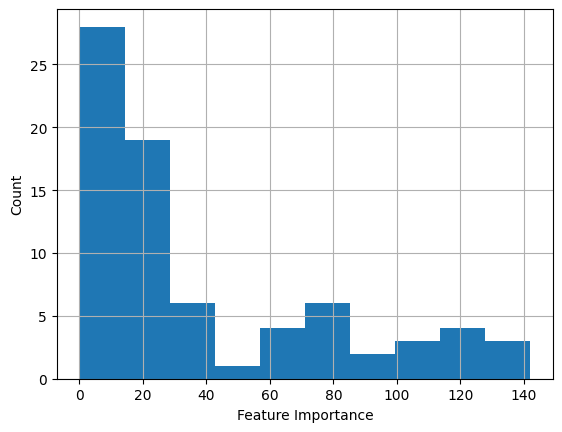

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
x=seltree_lgbm.estimator_.feature_importances_.ravel()
plt.hist(x)
plt.grid() 
plt.xlabel('Feature Importance')
plt.ylabel('Count')
plt.show()

In [69]:
lgbmmodeltree = LGBMClassifier()

lgbmmodeltree.fit(x_trainlgbmtree, y_trainlgbmtree)

y_predlgbmtree = lgbmmodeltree.predict(x_testlgbmtree)

cm_lgbmtree = confusion_matrix(y_testlgbmtree, y_predlgbmtree)
ac_lgbmtree = accuracy_score(y_testlgbmtree,y_predlgbmtree)
pr_lgbmtree = precision_score(y_testlgbmtree, y_predlgbmtree, average='weighted')
rs_lgbmtree = recall_score(y_testlgbmtree, y_predlgbmtree, average='weighted')
ac_lgbmtree,pr_lgbmtree,rs_lgbmtree,cm_lgbmtree


(0.9492063492063492,
 0.9492063492063492,
 0.9492063492063492,
 array([[604,  32],
        [ 32, 592]], dtype=int64))

In [70]:
tn_lgbmtree, fp_lgbmtree, fn_lgbmtree, tp_lgbmtree = confusion_matrix(y_testlgbmtree, y_predlgbmtree).ravel()

specificity_lgbmtree = tn_lgbmtree / (tn_lgbmtree+fp_lgbmtree)
sensitivity_lgbmtree = tp_lgbmtree / (tp_lgbmtree+fn_lgbmtree)
roc_auc_score_lgbmtree = roc_auc_score(y_testlgbmtree, y_predlgbmtree)

print('Specificity:',specificity_lgbmtree), print('Sensitivity:',sensitivity_lgbmtree), print('roc_auc_score_lgbmtree:',roc_auc_score_lgbmtree)

Specificity: 0.949685534591195
Sensitivity: 0.9487179487179487
roc_auc_score_lgbmtree: 0.9492017416545718


(None, None, None)

In [71]:
import pickle

pickle.dump(lgbmmodeltree, open('lgbmtree_noninvasive.pkl', 'wb'))

# PENALIZED SVC

In [74]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(x_train, y_train)

svc_predict = svc_model.predict(x_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict,average='weighted'))
print("Precision:",precision_score(y_test, svc_predict,average='weighted'))



ROCAUC score: 0.7160740203193033
Accuracy score: 0.7158730158730159
F1 score: 0.7157763543148314
Precision: 0.7164922783235073


In [75]:
tnpsvc, fppsvc, fnpsvc, tppsvc = confusion_matrix(y_test, svc_predict).ravel()

specificity_tnpsvc = tnpsvc / (tnpsvc+fppsvc)
sensitivity_tppsvc = tppsvc / (tppsvc+fnpsvc)

print('Specificity:',specificity_tnpsvc), print('Sensitivity:',sensitivity_tppsvc)


Specificity: 0.6949685534591195
Sensitivity: 0.7371794871794872


(None, None)

In [77]:
NPV_psvc = tnpsvc/ (tnpsvc + fnpsvc)
FDR_psvc = fppsvc/ (tppsvc + fppsvc)
ck_psvc = cohen_kappa_score(y_test, svc_predict)

NPV_psvc,precision_score(y_test, svc_predict,average='weighted'),FDR_psvc,ck_psvc

(0.7293729372937293,
 0.7164922783235073,
 0.2966360856269113,
 0.43195212621271195)

In [78]:
import pickle

pickle.dump(svc_model, open('psvc_noninvasive.pkl', 'wb'))

# SVC Linear

# Applying SelectFromModel Feature Selection

# Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB  


classifier_nb = GaussianNB()  
classifier_nb.fit(x_train, y_train)  

y_prednb = classifier_nb.predict(x_test)


cmnb = confusion_matrix(y_test, y_prednb)
acnb = accuracy_score(y_test,y_prednb)
prnb = precision_score(y_test, y_prednb, average='weighted')
rsnb = recall_score(y_test, y_prednb, average='weighted')
acnb,prnb,rsnb,cmnb

(0.7166666666666667,
 0.7454536210884872,
 0.7166666666666667,
 array([[351, 285],
        [ 72, 552]], dtype=int64))

In [81]:
import pickle

pickle.dump(classifier_nb, open('nb_noninvasive.pkl', 'wb'))

# KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
print(scores.mean())

0.9183093032434815


In [83]:
knn.fit(x_train,y_train)

y_predknn = knn.predict(x_test)

acknn = accuracy_score(y_test,y_predknn)

acknn

0.9293650793650794

In [84]:
k_range = list(range(1, 25))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9183093032434815, 0.8822316639966568, 0.8876726799934991, 0.8692902416939472, 0.8665598662673262, 0.8471593415523205, 0.8447725848018386, 0.8294513709920828, 0.8297915070465047, 0.8212846230642429, 0.8263959508718163, 0.8175419655916973, 0.8165296835457733, 0.801549766664345, 0.8022311996470943, 0.7937115460518678, 0.8018817766014255, 0.7845209073390448, 0.7865652062872931, 0.780097977757656, 0.7835097861670265, 0.7767059042046853, 0.7756808525457963, 0.7712532794687841]


Text(0, 0.5, 'Cross-Validated-Accuracy')

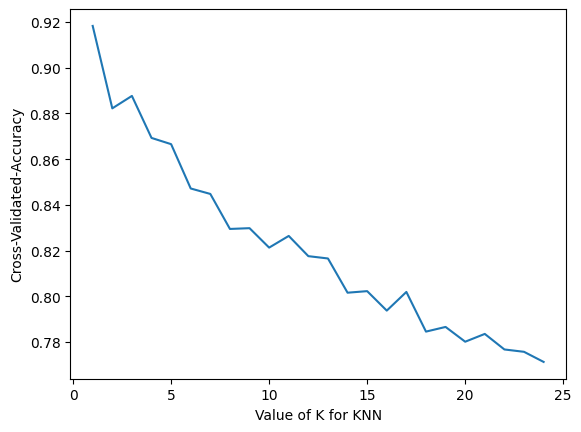

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated-Accuracy')

In [86]:
import pickle

pickle.dump(knn, open('knn_noninvasive.pkl', 'wb'))

# Logistic Regression With Recursive Feature Selection

In [88]:
from sklearn.linear_model import LogisticRegression  

classifier_lr= LogisticRegression(C=1.0, class_weight='balanced', fit_intercept=True,  
                   intercept_scaling=1, l1_ratio=1, max_iter=100,  
                   multi_class='ovr', penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, 
                   warm_start=False)

classifier_lr.fit(x_train, y_train)  

y_predlr= classifier_lr.predict(x_test)  

cmlr = confusion_matrix(y_test, y_predlr)
aclr = accuracy_score(y_test,y_predlr)
prlr = precision_score(y_test, y_predlr, average='weighted')
rslr = recall_score(y_test, y_predlr, average='weighted')
aclr,prlr,rslr,cmlr

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(0.7690476190476191,
 0.7691843536196429,
 0.7690476190476191,
 array([[499, 137],
        [154, 470]], dtype=int64))

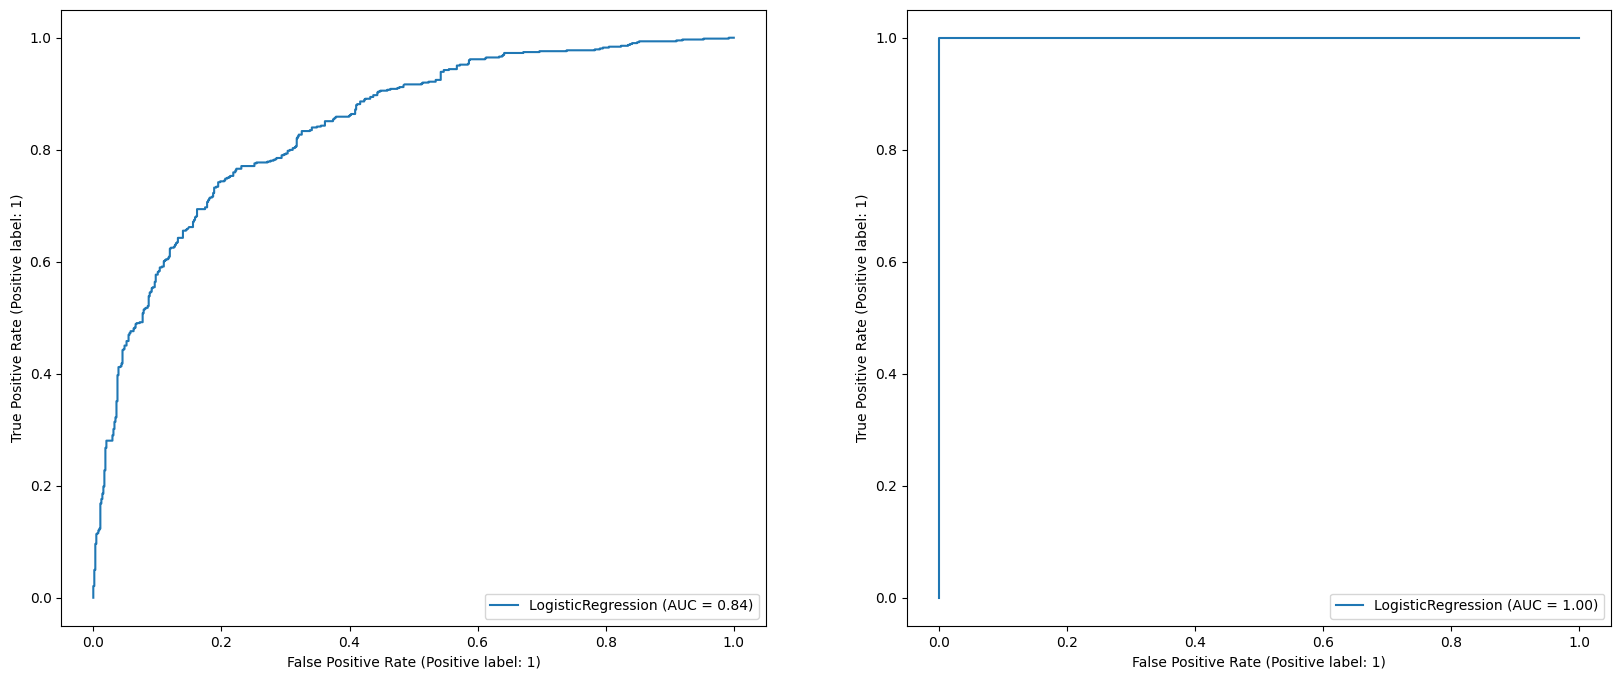

In [89]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
RocCurveDisplay.from_estimator(classifier_lr, x_test, y_test,ax=ax1)
RocCurveDisplay.from_estimator(classifier_lr, x_test, y_predlr,ax=ax2)
plt.show()

In [90]:
tnplr, fpplr, fnplr, tpplr = confusion_matrix(y_test, y_predlr).ravel()

specificity_tnplr = tnplr / (tnplr+fpplr)
sensitivity_tpplr = tpplr / (tpplr+fnplr)

print('Specificity:',specificity_tnplr), print('Sensitivity:',sensitivity_tpplr)


Specificity: 0.7845911949685535
Sensitivity: 0.7532051282051282


(None, None)

In [91]:
sel_lrrfe = RFE(LogisticRegression())
sel_lrrfe.fit(x_train,y_train)

features_lrrfe = x_train.columns[sel_lrrfe.get_support()]
len(features_lrrfe)

df_NIfeatures_lrrfe = pd.DataFrame(features_lrrfe)

df_NIfeatures_lrrfe = df_NIfeatures_lrrfe.rename(columns={0: 'features'})

df_NIfeatures_lrrfe['features'].to_pickle('NIfeatures_lrrfe.pkl')
df_NIfeatures_lrrfe

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

,features
0,birth_facility
1,maternal_haemoglobin
2,mother_bmi
3,maternal_diabetes
4,rupture_of_membranes_rom_one
5,leaking_pv
6,rupture_of_membranes_rom
7,smelly_amniotic_fluid
8,chorioamnionitis
9,delayed_cord_clamping


In [92]:
pd.DataFrame(features_lrrfe).to_excel('NIfeatures_lrrfe.xlsx')



df_lrrfe_feat = pd.DataFrame(columns=features_lrrfe,data=df_hospital_test_knnimputed)
df_lrrfe_feat


,birth_facility,maternal_haemoglobin,mother_bmi,maternal_diabetes,rupture_of_membranes_rom_one,leaking_pv,rupture_of_membranes_rom,smelly_amniotic_fluid,chorioamnionitis,delayed_cord_clamping,...,baby_respiratory_support_if_yes,low_peripheral_pulse_volume,central_line,skin_pustules,infusion_of_blood_products,seizures,af_bulge,abdominal_dystension,diarrhea,baby_movement
0,974.200000,961.600000,0.000000,980.0,985.000000,995.0,995.0,980.0,980.0,980.0,...,995.000000,980.0,980.0,989.0,980.0,980.0,980.0,980.000000,980.0,980.000000
1,974.200000,961.600000,0.000000,980.0,985.000000,995.0,995.0,980.0,980.0,980.0,...,995.000000,980.0,980.0,989.0,980.0,980.0,980.0,980.000000,980.0,980.000000
2,974.200000,961.600000,0.000000,980.0,985.000000,995.0,995.0,980.0,980.0,980.0,...,995.000000,980.0,980.0,989.0,980.0,980.0,980.0,980.000000,980.0,980.000000
3,974.200000,961.600000,0.000000,980.0,985.000000,995.0,995.0,980.0,980.0,980.0,...,995.000000,980.0,980.0,989.0,980.0,980.0,980.0,980.000000,980.0,980.000000
4,974.200000,961.600000,0.000000,980.0,985.000000,995.0,995.0,980.0,980.0,980.0,...,995.000000,980.0,980.0,989.0,980.0,980.0,980.0,980.000000,980.0,980.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,971.000000,964.400000,0.000000,980.0,985.000000,995.0,995.0,995.0,980.0,980.0,...,995.000000,980.0,980.0,980.0,980.0,980.0,980.0,980.000000,980.0,980.000000
4194,971.000000,960.000000,4.409235,980.0,979.295526,980.0,980.0,980.0,980.0,980.0,...,995.000000,980.0,980.0,980.0,980.0,980.0,980.0,994.154239,980.0,994.154239
4195,971.000000,961.600000,0.000000,980.0,985.000000,995.0,995.0,980.0,980.0,980.0,...,980.000000,980.0,980.0,980.0,980.0,980.0,980.0,980.000000,980.0,983.000000
4196,971.578358,971.238057,0.000000,980.0,958.000000,980.0,980.0,980.0,980.0,980.0,...,995.000000,980.0,980.0,980.0,980.0,980.0,980.0,989.577889,980.0,980.000000


In [93]:
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(df_lrrfe_feat, df_hospital_y, test_size = 0.3, random_state = 0)

In [95]:
clf_lrrfe = LogisticRegression()

clf_lrrfe.fit(x_trainlr, y_trainlr)

y_predlrrfe = clf_lrrfe.predict(x_testlr)

#Accuracy Score Before Recursive Feature Elimination
print(accuracy_score(y_testlr,y_predlrrfe,normalize=True),confusion_matrix(y_testlr,y_predlrrfe))

0.7357142857142858 [[481 155]
 [178 446]]


C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
tnplrrfe, fpplrrfe, fnplrrfe, tpplrrfe = confusion_matrix(y_testlr, y_predlrrfe).ravel()

specificity_tnplrrfe = tnplrrfe / (tnplrrfe+fpplrrfe)
sensitivity_tpplrrfe = tpplrrfe / (tpplrrfe+fnplrrfe)

print('Specificity:',specificity_tnplrrfe), print('Sensitivity:',sensitivity_tpplrrfe)


Specificity: 0.7562893081761006
Sensitivity: 0.7147435897435898


(None, None)

In [97]:
import pickle

pickle.dump(clf_lrrfe, open('lrrfe_NI.pkl', 'wb'))

# BALANCED RANDOMFOREST CLASSIFIER WITH RECURSIVE FEATURE SELECTION

In [98]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf.fit(x_train,y_train)

y_predbrf = brf.predict(x_test)
accuracy_score(y_test, y_predbrf)


C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

0.9555555555555556

In [99]:
sel_brfre = RFE(brf)
sel_brfre.fit(x_train,y_train)

features_brf_re = x_train.columns[sel_brfre.get_support()]
len(features_brf_re)




#Number of Optimal Features

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: Futur

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

38

In [100]:
pd.DataFrame(features_brf_re).to_excel('features_brf_re.xlsx')

df_brfre_feat = pd.DataFrame(columns=features_brf_re,data=df_hospital_test_knnimputed)
df_brfre_feat

,baby_apgar_score_one_min,baby_apgar_score_five_min,baby_apgar_score_ten_min,birth_facility,baby_weight_at_birth,baby_weight_at_admission,mother_age,mother_weight,mother_height,maternal_haemoglobin,...,baby_chest_indrawing,baby_respiratory_support,heart_rate,baby_blood_pressure_mean_arterial_bp,baby_blood_pressure_upper_limb,baby_blood_pressure_lower_limb,capillary_refill_unit,frequency_of_stools,feeding_intolerance,baby_movement
0,762.000000,874.000000,412.200000,974.200000,73.000000,73.000000,682.200000,0.000000,1.000000,961.600000,...,980.000000,1007.000000,152.000000,858.200000,778.200000,771.800000,956.0,251.000000,980.000000,980.000000
1,762.000000,874.000000,412.200000,974.200000,73.000000,73.000000,682.200000,0.000000,1.000000,961.600000,...,980.000000,1007.000000,152.000000,858.200000,778.200000,771.800000,956.0,251.000000,980.000000,980.000000
2,762.000000,874.000000,412.200000,974.200000,73.000000,73.000000,682.200000,0.000000,1.000000,961.600000,...,980.000000,1007.000000,152.000000,858.200000,778.200000,771.800000,956.0,251.000000,980.000000,980.000000
3,762.000000,874.000000,412.200000,974.200000,73.000000,73.000000,682.200000,0.000000,1.000000,961.600000,...,980.000000,1007.000000,152.000000,858.200000,778.200000,771.800000,956.0,251.000000,980.000000,980.000000
4,762.000000,874.000000,412.200000,974.200000,73.000000,73.000000,682.200000,0.000000,1.000000,961.600000,...,980.000000,1007.000000,152.000000,858.200000,778.200000,771.800000,956.0,251.000000,980.000000,980.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,772.000000,882.200000,412.200000,971.000000,48.000000,48.000000,576.800000,0.000000,1.000000,964.400000,...,995.000000,1017.000000,191.000000,802.000000,742.400000,735.200000,956.0,251.000000,995.000000,980.000000
4194,766.217529,813.398325,871.902512,971.000000,110.943616,110.943616,438.364862,302.509785,9.141861,960.000000,...,980.845761,1002.281920,201.887232,723.341574,713.154239,708.747906,956.0,50.528543,994.154239,994.154239
4195,762.000000,874.000000,412.200000,971.000000,73.000000,73.000000,526.400000,0.000000,1.000000,961.600000,...,980.000000,1017.000000,196.000000,770.800000,751.600000,687.800000,956.0,251.000000,980.000000,983.000000
4196,827.835444,884.471826,886.298960,971.578358,528.939363,345.445896,478.541038,0.000000,1.000000,971.238057,...,995.000000,1010.854941,175.868007,748.419967,800.980502,779.692933,956.0,251.000000,980.000000,980.000000


In [101]:
x_trainbrfre, x_testbrfre, y_trainbrfre, y_testbrfre = train_test_split(df_brfre_feat, df_hospital_y, test_size = 0.3, random_state = 0)

In [102]:
brfre = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brfre.fit(x_trainbrfre,y_trainbrfre)

y_predbrfre = brfre.predict(x_testbrfre)
accuracy_score(y_testbrfre, y_predbrfre)

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SPK_ADMIN\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: User

0.9468253968253968

In [103]:
from sklearn.metrics import confusion_matrix

tnbrfre, fpbrfre, fnbrfre, tpbrfre = confusion_matrix(y_testbrfre, y_predbrfre).ravel()

specificity_tnbrfre = tnbrfre / (tnbrfre+fpbrfre)
sensitivity_tpbrfre = tpbrfre / (tpbrfre+fnbrfre)
roc_auc_brfre = roc_auc_score(y_testbrfre, y_predbrfre)

print('Specificity:',specificity_tnbrfre), print('Sensitivity:',sensitivity_tpbrfre), print('roc_auc_brfre:',roc_auc_brfre)


Specificity: 0.940251572327044
Sensitivity: 0.9535256410256411
roc_auc_brfre: 0.9468886066763426


(None, None, None)

In [104]:
confusion_matrix(y_testbrfre, y_predbrfre)

array([[598,  38],
       [ 29, 595]], dtype=int64)

In [105]:
import pickle

pickle.dump(brfre, open('brfre_noninvasive.pkl', 'wb'))